## House Price Prediction Project

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (8,5.5)

In [2]:
data_location = 'data/Bengaluru_House_Data.csv'
data = pd.read_csv(data_location)

In [3]:
data.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [4]:
data.tail()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
13315,Built-up Area,Ready To Move,Whitefield,5 Bedroom,ArsiaEx,3453,4.0,0.0,231.0
13316,Super built-up Area,Ready To Move,Richards Town,4 BHK,NaN,3600,5.0,NaN,400.0
13317,Built-up Area,Ready To Move,Raja Rajeshwari Nagar,2 BHK,Mahla T,1141,2.0,1.0,60.0
13318,Super built-up Area,18-Jun,Padmanabhanagar,4 BHK,SollyCl,4689,4.0,1.0,488.0
13319,Super built-up Area,Ready To Move,Doddathoguru,1 BHK,NaN,550,1.0,1.0,17.0


In [5]:
data.shape

(13320, 9)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13320 entries, 0 to 13319
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   area_type     13320 non-null  object 
 1   availability  13320 non-null  object 
 2   location      13319 non-null  object 
 3   size          13304 non-null  object 
 4   society       7818 non-null   object 
 5   total_sqft    13320 non-null  object 
 6   bath          13247 non-null  float64
 7   balcony       12711 non-null  float64
 8   price         13320 non-null  float64
dtypes: float64(3), object(6)
memory usage: 936.7+ KB


In [7]:
data['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [8]:
data[data['location'].isna()]

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
568,Super built-up Area,Ready To Move,NaN,3 BHK,Grare S,1600,3.0,2.0,86.0


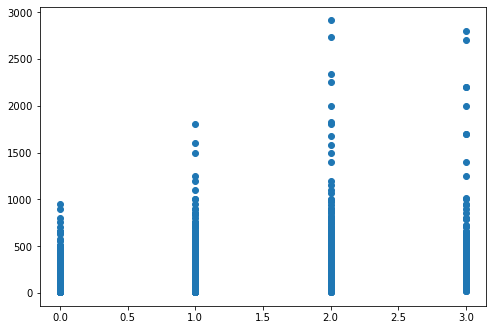

In [9]:
plt.scatter(data.balcony, data.price);

In [10]:
house_data = data.drop(['area_type', 'availability', 'society', 'balcony'], axis=1)

In [11]:
house_data.head()

,location,size,total_sqft,bath,price
0,Electronic City Phase II,2 BHK,1056,2.0,39.07
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00
2,Uttarahalli,3 BHK,1440,2.0,62.00
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00
4,Kothanur,2 BHK,1200,2.0,51.00


In [12]:
house_data.isna().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

In [13]:
house_data.dropna(inplace=True)

In [14]:
house_data.shape

(13246, 5)

In [15]:
house_data['size (in BHK)'] = house_data['size'].apply(lambda x: int(x.split(' ')[0]))

In [16]:
# function to convert object 'total_sqft' to integer vlaue

def object_to_float(value):
    try:
        float(value)
    except:
        return False
    return True

In [17]:
house_data['total_area'] = house_data['total_sqft'].apply(object_to_float)

In [18]:
house_data.drop(['size'], axis=1, inplace=True)

In [19]:
house_data.head(10)

,location,total_sqft,bath,price,size (in BHK),total_area
0,Electronic City Phase II,1056,2.0,39.07,2,True
1,Chikka Tirupathi,2600,5.0,120.00,4,True
2,Uttarahalli,1440,2.0,62.00,3,True
3,Lingadheeranahalli,1521,3.0,95.00,3,True
4,Kothanur,1200,2.0,51.00,2,True
5,Whitefield,1170,2.0,38.00,2,True
6,Old Airport Road,2732,4.0,204.00,4,True
7,Rajaji Nagar,3300,4.0,600.00,4,True
8,Marathahalli,1310,3.0,63.25,3,True
9,Gandhi Bazar,1020,6.0,370.00,6,True


In [20]:
house_data[~ house_data['total_area']]

,location,total_sqft,bath,price,size (in BHK),total_area
30,Yelahanka,2100 - 2850,4.0,186.000,4,False
122,Hebbal,3067 - 8156,4.0,477.000,4,False
137,8th Phase JP Nagar,1042 - 1105,2.0,54.005,2,False
165,Sarjapur,1145 - 1340,2.0,43.490,2,False
188,KR Puram,1015 - 1540,2.0,56.800,2,False
...,...,...,...,...,...,...
12975,Whitefield,850 - 1060,2.0,38.190,2,False
12990,Talaghattapura,1804 - 2273,3.0,122.000,3,False
13059,Harlur,1200 - 1470,2.0,72.760,2,False
13265,Hoodi,1133 - 1384,2.0,59.135,2,False


In [21]:
def floatConversion(x):
    values = x.split('-')
    if len(values) == 2:
        newNumber = (float(values[0]) + float(values[1]))/2
        return newNumber
    try:
        return float(x)
    except:
        return None

In [22]:
house_data['area (in sq.ft)'] = house_data['total_sqft'].apply(floatConversion)

In [23]:
house_data.head()

,location,total_sqft,bath,price,size (in BHK),total_area,area (in sq.ft)
0,Electronic City Phase II,1056,2.0,39.07,2,True,1056.0
1,Chikka Tirupathi,2600,5.0,120.00,4,True,2600.0
2,Uttarahalli,1440,2.0,62.00,3,True,1440.0
3,Lingadheeranahalli,1521,3.0,95.00,3,True,1521.0
4,Kothanur,1200,2.0,51.00,2,True,1200.0


In [24]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13246 entries, 0 to 13319
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         13246 non-null  object 
 1   total_sqft       13246 non-null  object 
 2   bath             13246 non-null  float64
 3   price            13246 non-null  float64
 4   size (in BHK)    13246 non-null  int64  
 5   total_area       13246 non-null  bool   
 6   area (in sq.ft)  13200 non-null  float64
dtypes: bool(1), float64(3), int64(1), object(2)
memory usage: 737.3+ KB


In [25]:
house_data

,location,total_sqft,bath,price,size (in BHK),total_area,area (in sq.ft)
0,Electronic City Phase II,1056,2.0,39.07,2,True,1056.0
1,Chikka Tirupathi,2600,5.0,120.00,4,True,2600.0
2,Uttarahalli,1440,2.0,62.00,3,True,1440.0
3,Lingadheeranahalli,1521,3.0,95.00,3,True,1521.0
4,Kothanur,1200,2.0,51.00,2,True,1200.0
...,...,...,...,...,...,...,...
13315,Whitefield,3453,4.0,231.00,5,True,3453.0
13316,Richards Town,3600,5.0,400.00,4,True,3600.0
13317,Raja Rajeshwari Nagar,1141,2.0,60.00,2,True,1141.0
13318,Padmanabhanagar,4689,4.0,488.00,4,True,4689.0


In [26]:
house_data['area (in sq.ft)'].isna().sum()

46

In [27]:
house_data.dropna(inplace=True)

In [28]:
house_data.drop('total_area', axis=1, inplace=True)

In [29]:
house_data.isna().sum()

location           0
total_sqft         0
bath               0
price              0
size (in BHK)      0
area (in sq.ft)    0
dtype: int64

In [30]:
house_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         13200 non-null  object 
 1   total_sqft       13200 non-null  object 
 2   bath             13200 non-null  float64
 3   price            13200 non-null  float64
 4   size (in BHK)    13200 non-null  int64  
 5   area (in sq.ft)  13200 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 721.9+ KB


In [31]:
real_estate = house_data[['location', 'size (in BHK)', 'bath', 'area (in sq.ft)', ('price')]]

In [32]:
real_estate

,location,size (in BHK),bath,area (in sq.ft),price
0,Electronic City Phase II,2,2.0,1056.0,39.07
1,Chikka Tirupathi,4,5.0,2600.0,120.00
2,Uttarahalli,3,2.0,1440.0,62.00
3,Lingadheeranahalli,3,3.0,1521.0,95.00
4,Kothanur,2,2.0,1200.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,4.0,3453.0,231.00
13316,Richards Town,4,5.0,3600.0,400.00
13317,Raja Rajeshwari Nagar,2,2.0,1141.0,60.00
13318,Padmanabhanagar,4,4.0,4689.0,488.00


In [33]:
real_estate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 13200 entries, 0 to 13319
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         13200 non-null  object 
 1   size (in BHK)    13200 non-null  int64  
 2   bath             13200 non-null  float64
 3   area (in sq.ft)  13200 non-null  float64
 4   price            13200 non-null  float64
dtypes: float64(3), int64(1), object(1)
memory usage: 618.8+ KB


In [34]:
Q1 = 4210.5263
Q3 = 6916.6667
IQR = Q3 - Q1
print(Q1-(1.5*IQR))

151.31570000000147


In [35]:
real_estate

,location,size (in BHK),bath,area (in sq.ft),price
0,Electronic City Phase II,2,2.0,1056.0,39.07
1,Chikka Tirupathi,4,5.0,2600.0,120.00
2,Uttarahalli,3,2.0,1440.0,62.00
3,Lingadheeranahalli,3,3.0,1521.0,95.00
4,Kothanur,2,2.0,1200.0,51.00
...,...,...,...,...,...
13315,Whitefield,5,4.0,3453.0,231.00
13316,Richards Town,4,5.0,3600.0,400.00
13317,Raja Rajeshwari Nagar,2,2.0,1141.0,60.00
13318,Padmanabhanagar,4,4.0,4689.0,488.00


In [36]:
real_estate2 = real_estate.copy()

In [37]:
real_estate2['price per sqft'] = (real_estate2['price']*100000)/(real_estate2['area (in sq.ft)'])

In [38]:
real_estate2.head(10)

,location,size (in BHK),bath,area (in sq.ft),price,price per sqft
0,Electronic City Phase II,2,2.0,1056.0,39.07,3699.810606
1,Chikka Tirupathi,4,5.0,2600.0,120.00,4615.384615
2,Uttarahalli,3,2.0,1440.0,62.00,4305.555556
3,Lingadheeranahalli,3,3.0,1521.0,95.00,6245.890861
4,Kothanur,2,2.0,1200.0,51.00,4250.000000
5,Whitefield,2,2.0,1170.0,38.00,3247.863248
6,Old Airport Road,4,4.0,2732.0,204.00,7467.057101
7,Rajaji Nagar,4,4.0,3300.0,600.00,18181.818182
8,Marathahalli,3,3.0,1310.0,63.25,4828.244275
9,Gandhi Bazar,6,6.0,1020.0,370.00,36274.509804


In [39]:
len(real_estate2.location.unique())

1298

In [40]:
real_estate2.location = real_estate2.location.apply(lambda x: x.strip())

In [41]:
location_counts = real_estate2['location'].value_counts().sort_values(ascending=False)
location_counts

Whitefield                              533
Sarjapur  Road                          392
Electronic City                         304
Kanakpura Road                          264
Thanisandra                             235
                                       ... 
Electronic City Phase 1,                  1
Chuchangatta Colony                       1
Hanuman Nagar                             1
Kengeri Satellite Town KHB Apartment      1
Abshot Layout                             1
Name: location, Length: 1287, dtype: int64

In [42]:
unnecessary_locations = location_counts[location_counts <= 10]
unnecessary_locations

Kalkere                                 10
Nagadevanahalli                         10
Sadashiva Nagar                         10
Dairy Circle                            10
Dodsworth Layout                        10
                                        ..
Electronic City Phase 1,                 1
Chuchangatta Colony                      1
Hanuman Nagar                            1
Kengeri Satellite Town KHB Apartment     1
Abshot Layout                            1
Name: location, Length: 1047, dtype: int64

In [43]:
real_estate2['location'] = real_estate2['location'].apply(lambda x: 'Others' if x in unnecessary_locations else x)

In [44]:
len(real_estate2['location'].unique())

241

In [45]:
real_estate2.head()

,location,size (in BHK),bath,area (in sq.ft),price,price per sqft
0,Electronic City Phase II,2,2.0,1056.0,39.07,3699.810606
1,Chikka Tirupathi,4,5.0,2600.0,120.00,4615.384615
2,Uttarahalli,3,2.0,1440.0,62.00,4305.555556
3,Lingadheeranahalli,3,3.0,1521.0,95.00,6245.890861
4,Kothanur,2,2.0,1200.0,51.00,4250.000000


In [46]:
real_estate2 = real_estate2[~(real_estate2['area (in sq.ft)']/real_estate2['size (in BHK)'] < 300)]

In [47]:
real_estate2.shape

(12456, 6)

In [48]:
real_estate2[(real_estate2['area (in sq.ft)']/real_estate2['size (in BHK)'] < 300)]

,location,size (in BHK),bath,area (in sq.ft),price,price per sqft


In [49]:
real_estate2['price per sqft'].describe()

count     12456.000000
mean       6308.502826
std        4168.127339
min         267.829813
25%        4210.526316
50%        5294.117647
75%        6916.666667
max      176470.588235
Name: price per sqft, dtype: float64

In [50]:
real_estate3 = real_estate2.copy()

In [73]:
Q1 = real_estate3['price per sqft'].quantile(0.25)
Q3 = real_estate2['price per sqft'].quantile(0.75)
IQR = Q3-Q1
Out1 = Q1-(1.5*IQR)
Out2 = Q3+(1.5*IQR)

In [52]:
Out1

151.3157894736828

In [53]:
Out2

10975.877192982458

In [54]:
real_estate3.shape

(12456, 6)

In [55]:
real_estate3 = real_estate3[~(real_estate3['price per sqft'] < Out1)]

In [56]:
real_estate3.shape

(12456, 6)

In [57]:
real_estate3 = real_estate3[~(real_estate3['price per sqft'] > Out2)]

In [58]:
real_estate3.shape

(11453, 6)

In [59]:
real_estate3['price per sqft'].describe()

count    11453.000000
mean      5413.464008
std       1758.555400
min        267.829813
25%       4123.711340
50%       5100.483092
75%       6412.478336
max      10967.098704
Name: price per sqft, dtype: float64

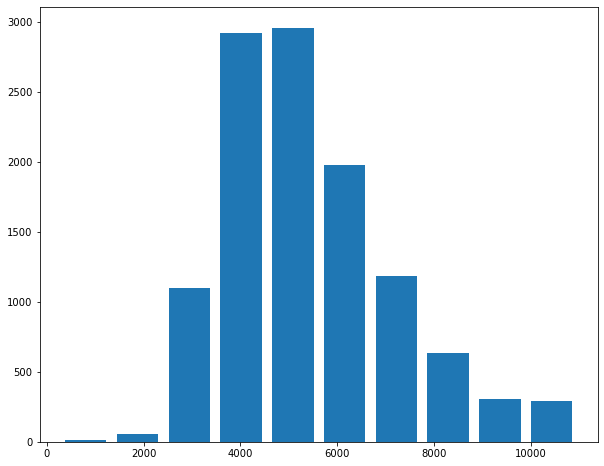

In [60]:
import matplotlib
matplotlib.rcParams['figure.figsize'] = (10,8)
plt.hist(real_estate3['price per sqft'], rwidth=0.8);

In [61]:
real_estate3['bath'].unique()

array([ 2.,  5.,  3.,  4.,  1.,  8.,  6.,  7.,  9., 12., 16., 10., 13.])

In [62]:
real_estate3[real_estate3['bath'] > 10]

,location,size (in BHK),bath,area (in sq.ft),price,price per sqft
3096,Others,10,12.0,12000.0,525.0,4375.000000
3609,Others,16,16.0,10000.0,550.0,5500.000000
7979,Others,11,12.0,6000.0,150.0,2500.000000
8636,Neeladri Nagar,10,12.0,4000.0,160.0,4000.000000
9935,Others,13,13.0,5425.0,275.0,5069.124424


In [63]:
real_estate3[(real_estate3['bath'] < real_estate3['size (in BHK)'] + 2)]

,location,size (in BHK),bath,area (in sq.ft),price,price per sqft
0,Electronic City Phase II,2,2.0,1056.0,39.07,3699.810606
1,Chikka Tirupathi,4,5.0,2600.0,120.00,4615.384615
2,Uttarahalli,3,2.0,1440.0,62.00,4305.555556
3,Lingadheeranahalli,3,3.0,1521.0,95.00,6245.890861
4,Kothanur,2,2.0,1200.0,51.00,4250.000000
...,...,...,...,...,...,...
13314,Green Glen Layout,3,3.0,1715.0,112.00,6530.612245
13315,Whitefield,5,4.0,3453.0,231.00,6689.834926
13317,Raja Rajeshwari Nagar,2,2.0,1141.0,60.00,5258.545136
13318,Padmanabhanagar,4,4.0,4689.0,488.00,10407.336319


In [64]:
real_estate3 = real_estate3[real_estate3['bath'] < real_estate3['size (in BHK)'] + 2]

In [65]:
real_estate3.shape

(11355, 6)

In [66]:
real_estate3.head()

,location,size (in BHK),bath,area (in sq.ft),price,price per sqft
0,Electronic City Phase II,2,2.0,1056.0,39.07,3699.810606
1,Chikka Tirupathi,4,5.0,2600.0,120.00,4615.384615
2,Uttarahalli,3,2.0,1440.0,62.00,4305.555556
3,Lingadheeranahalli,3,3.0,1521.0,95.00,6245.890861
4,Kothanur,2,2.0,1200.0,51.00,4250.000000


In [67]:
real_estate3.shape

(11355, 6)

In [68]:
real_estate3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11355 entries, 0 to 13319
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   location         11355 non-null  object 
 1   size (in BHK)    11355 non-null  int64  
 2   bath             11355 non-null  float64
 3   area (in sq.ft)  11355 non-null  float64
 4   price            11355 non-null  float64
 5   price per sqft   11355 non-null  float64
dtypes: float64(4), int64(1), object(1)
memory usage: 621.0+ KB


In [69]:
real_estate3.isna().sum()

location           0
size (in BHK)      0
bath               0
area (in sq.ft)    0
price              0
price per sqft     0
dtype: int64

In [70]:
real_estate3.rename(columns = {'bath':'bathrooms'}, inplace=True)

In [71]:
real_estate3.head()

,location,size (in BHK),bathrooms,area (in sq.ft),price,price per sqft
0,Electronic City Phase II,2,2.0,1056.0,39.07,3699.810606
1,Chikka Tirupathi,4,5.0,2600.0,120.00,4615.384615
2,Uttarahalli,3,2.0,1440.0,62.00,4305.555556
3,Lingadheeranahalli,3,3.0,1521.0,95.00,6245.890861
4,Kothanur,2,2.0,1200.0,51.00,4250.000000


In [74]:
real_estate3.drop('price per sqft', axis=1, inplace=True)

In [75]:
X = real_estate3.drop('price', axis=1)
y = real_estate3['price']

In [76]:
# Turn categorical features (location) into numerical data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_feature = ['location']
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot', one_hot, categorical_feature)], remainder='passthrough')

transformed_X = transformer.fit_transform(X)

In [77]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

X_train, X_test, y_train, y_test = train_test_split(transformed_X, y, test_size=0.2, random_state=10)

model1 = RandomForestRegressor()

model1.fit(X_train, y_train)
model1.score(X_test, y_test)

0.7689663349712044